In [29]:
from astropy.table import Table, join
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
%matplotlib inline

from my_progs.catalog.read_icrf import read_icrf3
from my_progs.catalog.read_gaia import read_dr2_iers

In [25]:
icrf3sx = read_icrf3(wv="sx")
icrf3k = read_icrf3(wv="k")
icrf3ka = read_icrf3(wv="xka")
gdr2 = read_dr2_iers()

icrf3sx.remove_columns(["icrf_name", "type"])
icrf3k.remove_columns(["icrf_name", "type"])
icrf3ka.remove_columns(["icrf_name", "type"])

tmp1 = join(icrf3sx, icrf3k, keys="iers_name", table_names=["x", "k"])
tmp2 = join(icrf3ka, gdr2, keys="iers_name", table_names=["ka", "g"])
comsou = join(tmp1, tmp2, keys="iers_name")

In [18]:
def print_median_err(cat_name, ra_err, dec_err, pos_err):
    """
    """
    
    print("{:s}    {:.3f}    {:.3f}    {:.3f}".format(
        cat_name, np.median(ra_err), np.median(dec_err), np.median(pos_err)))

In [28]:
print_median_err("ICRF3  SX", comsou["ra_err_x"], comsou["dec_err_x"], comsou["pos_err_x"])
print_median_err("ICRF3   K", comsou["ra_err_k"], comsou["dec_err_k"], comsou["pos_err_k"])
print_median_err("ICRF3 XKa", comsou["ra_err_ka"], comsou["dec_err_ka"], comsou["pos_err_ka"])
print_median_err("GAIA  DR2", comsou["ra_err_g"], comsou["dec_err_g"], comsou["pos_err_g"])

ICRF3  SX    0.043    0.053    0.055
ICRF3   K    0.066    0.126    0.128
ICRF3 XKa    0.067    0.098    0.104
GAIA  DR2    0.189    0.167    0.218


/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


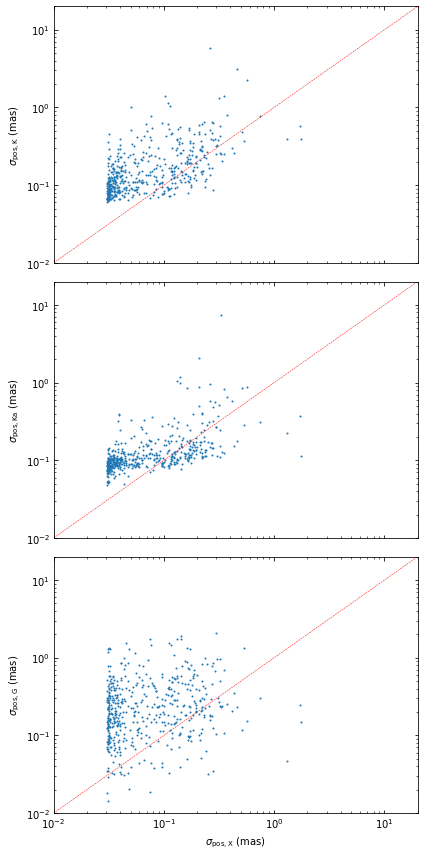

In [33]:
# dRA/ddec vs. R.A./decl. (Gaia-X)
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 12), nrows=3, sharex=True, sharey=True)

ax0.axis([0.01, 20, 0.01, 20])
ax0.plot(comsou["pos_err_x"], comsou["pos_err_k"], ".", ms=2)
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\\sigma_{\\rm pos, K}$ (mas)")
# ax0.set_xlabel("$X$ (K $-$ X)")


ax1.plot(comsou["pos_err_x"], comsou["pos_err_ka"], ".", ms=2)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\\sigma_{\\rm pos, Ka}$ (mas)")
# ax1.set_xlabel("$X$ (X/Ka $-$ X)")


ax2.plot(comsou["pos_err_x"], comsou["pos_err_g"], ".", ms=2)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.xaxis.set_ticks_position("both")
ax2.yaxis.set_ticks_position("both")
ax2.set_ylabel("$\\sigma_{\\rm pos, G}$ (mas)")
ax2.set_xlabel("$\\sigma_{\\rm pos, X}$ (mas)")

x = np.arange(0.01, 20, 0.1)
ax0.plot(x, x, "r--", lw=0.5)
ax1.plot(x, x, "r--", lw=0.5)
ax2.plot(x, x, "r--", lw=0.5)

plt.tight_layout()